In [3]:
import tensorflow as tf

mNist = tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)= mNist.load_data()

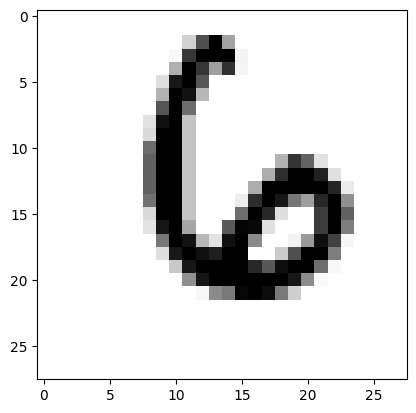

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_test[88],cmap=plt.cm.binary)
plt.show()


x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [7]:
print(x_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2603 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1060 - accuracy: 0.9672
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0729 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0535 - accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0414 - accuracy: 0.9865


In [11]:
val_loss,val_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0987 - accuracy: 0.9725


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.save('number_identifier.model')

INFO:tensorflow:Assets written to: number_identifier.model\assets


In [25]:
loaded = keras.models.load_model('number_identifier.model')



In [27]:
predictions =loaded.predict([x_test])

313/313 [==============================] - 1s 3ms/step


In [28]:
import numpy as np
print(np.argmax(predictions[90]))

3


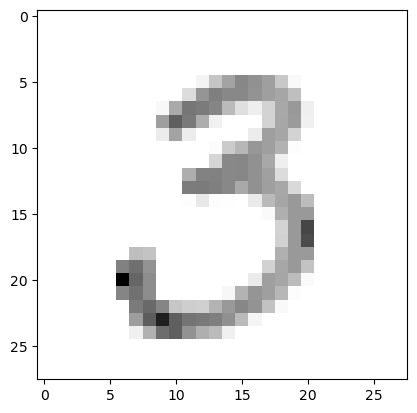

In [30]:
plt.imshow(x_test[90],cmap=plt.cm.binary)
plt.show()